#Exploratory Data Analysis (EDA) **Project**

## Introduction

* India has one of the fastest-growing economies in the world. Many new and innovative startups are emerging, and they are receiving a lot of funding.

* In this notebook, we will explore the data on Indian startup funding to understand more about this ecosystem and how it has changed over time.

## Objectives

* How Does the Funding Ecosystem changes with respect to Time?
* What is the General Amount that Startups get in India?
* Which Kind of Industries are more preferred for Startups?
* Does Location also play a role, In determining the Growth of a Startup?
* Who plays the main role in Indian Startups Ecosystem?
* What are the different Types of Funding for Startups?

## About the dataset
* **Dataset**: 'startup_funding.csv'

* **Content**: This dataset contains information about funding provided to startups in India.

* **Rows**: 3044

* **Columns**: 10

    INPUT:
- Sr No - Serial number for each entry
- Date dd/mm/yyyy - The date when the funding was provided, in the format dd/mm/yyyy
- Startup Name - The name of the startup that received funding
- Industry Vertical - The industry or sector in which the startup operates, such as technology, healthcare, e-commerce, etc.
- SubVertical - A more specific category within the industry, providing additional details about the startup's focus
- City  Location - The city or location where the startup is based
- Investors Name - The names of the investors or venture capital firms that provided the funding
- InvestmentnType - The type of investment, such as Seed Funding, Series A, Series B, etc.
- Amount in USD - The amount of funding received by the startup, typically expressed in US dollars
- Remarks - Any additional remarks or notes about the funding round or the startup


#     **Exploratory Data Analysis (EDA)**
## Data Reading and Cleaning

In [ ]:
# Import Libraries
import pandas as pd # type: ignore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing dataset
df0 = pd.read_csv('startup_funding.csv')
df = df0.copy()


## Understanding the Data

In [ ]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [ ]:
# (rows, columns)
df.shape

(3044, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [ ]:
df.describe()

,Sr No
count,"3,044.00"
mean,"1,522.50"
std,878.87
min,1.00
25%,761.75
50%,"1,522.50"
75%,"2,283.25"
max,"3,044.00"


## Check the Missing Values

In [ ]:
!pip install skimpy


In [ ]:
from skimpy import skim

In [ ]:
skim(df) # summarieses the dataFrame

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 3044   │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 10     │ │ int64       │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃ column     ┃ NA   ┃ NA %    ┃ mean    ┃ sd       ┃ p0   ┃ p25      ┃ p50     ┃ p75     ┃ p100   ┃ hist     ┃  │
│ ┡━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Sr No      │    0 │       0 │    1522 │    878.9 │    1 │    761.8 │    1522 │    2283 │   3044 │  ██████  │  │
│ └────────────┴──────┴─────────┴─────────┴──────────┴──────┴──────────┴─────────┴─────────┴────────┴──────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━━┓  │
│ ┃          ┃      ┃          ┃          ┃           ┃          ┃           ┃ chars    ┃ words per ┃ total    ┃  │
│ ┃ column   ┃ NA   ┃ NA %     ┃ shortest ┃ longest   ┃ min      ┃ max       ┃ per row  ┃ row       ┃ words    ┃  │
│ ┡━━━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━━┩  │
│ │ Date     │    0 │        0 │ 05/07201 │ \\xc2\\xa │ 01/01/20 │ \\xc2\\xa │       10 │         1 │     3044 │  │
│ │ dd/mm/yy │      │          │ 8        │ 010/7/201 │ 16       │ 010/7/201 │          │           │          │  │
│ │ yy       │      │          │          │ 5         │          │ 5         │          │           │          │  │
│ │ Startup  │    0 │        0 │ 75F      │ Samunnati │ "BYJU\\' │ zippserv  │     9.34 │       1.3 │     3877 │  │
│ │ Name     │      │          │          │ Financial │ S"       │           │          │           │          │  │
│ │          │      │          │          │ Intermedi │          │           │          │           │          │  │
│ │          │      │          │          │ ation &   │          │           │          │           │          │  │
│ │          │      │          │          │ Services  │          │           │          │           │          │  │
│ │          │      │          │          │ Pvt. Ltd  │          │           │          │           │          │  │
│ │ Industry │  171 │ 5.617608 │ AI       │ Medical   │ 360-degr │ visual    │     17.4 │         2 │     6087 │  │
│ │ Vertical │      │ 40998685 │          │ Consultat │ ee view  │ search    │          │           │          │  │
│ │          │      │        9 │          │ ion &     │ creating │ and       │          │           │          │  │
│ │          │      │          │          │ Doctor    │ platform │ discovery │          │           │          │  │
│ │          │      │          │          │ appointme │          │ platform  │          │           │          │  │
│ │          │      │          │          │ nt        │          │           │          │           │          │  │
│ │          │      │          │          │ booking   │ 

## Check the Duplicated Values

In [ ]:
df.duplicated().sum()


np.int64(0)

## Clean and prepare the data

### Rename the Columns

In [ ]:
# Rename columns
df.rename(columns={
    "Sr No": "sr_No",
    "Date dd/mm/yyyy": "date",
    "Startup Name": "startup_name",
    "Industry Vertical": "industry_vertical",
    "SubVertical": "sub_vertical",
    "City  Location": "city_location",
    "Investors Name": "undisclosed_investor",
    "InvestmentnType": "investment_type",
    "Amount in USD": "amount_USD",
    "Remarks": "remarks"
}, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   sr_No                 3044 non-null   int64 
 1   date                  3044 non-null   object
 2   startup_name          3044 non-null   object
 3   industry_vertical     2873 non-null   object
 4   sub_vertical          2108 non-null   object
 5   city_location         2864 non-null   object
 6   undisclosed_investor  3020 non-null   object
 7   investment_type       3040 non-null   object
 8   amount_USD            2084 non-null   object
 9   remarks               419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


### Date-Time Transformations

In [ ]:
# Fix the values in the date column

df['date'][df['date']=='01/07/015'] = '01/07/2015'
df['date'][df['date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'
df['date'][df['date']=='12/05.2015'] = '12/05/2015'
df['date'][df['date']=='13/04.2015'] = '13/04/2015'
df['date'][df['date']=='15/01.2015'] = '15/01/2015'
df['date'][df['date']=='22/01//2015'] = '22/01/2015'
df['date'][df['date']=='05/072018'] = '05/07/2018'


# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract year and month from date(float)
df['year'] = df['date'].dt.year.astype(int)
df['month'] = df['date'].dt.month.astype(int)

In [ ]:
min_year = df['year'].min()
max_year = df['year'].max()

min_month = df[df['year'] == min_year]['month'].min()
max_month = df[df['year'] == max_year]['month'].max()

min_year_month = (min_year, min_month)
max_year_month = (max_year, max_month)

print("Minimum year-month:", min_year_month)
print("Maximum year-month:", max_year_month)

# The data is available from January 2015 till January 2020

Minimum year-month: (2015, 1)
Maximum year-month: (2020, 1)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            2084 non-null   object        
 9   remarks               419 non-null    object        
 10  year                  3044 non-null   int64         
 11  month                 3044 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 285.5+ KB


In [ ]:
df.sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,remarks,year,month
388,389,2018-02-28,Gaana,Technology,Online Music Streaming,Gurugram,"Tencent Holdings Ltd, Times Internet",Private Equity,"11,50,00,000",NaN,2018,2
1126,1127,2016-12-07,LookAtMe,Consumer Internet,Mobile App based Fashion Network,Singapore,Eros Labs,Seed Funding,NaN,NaN,2016,12
520,521,2017-11-28,Stanza Living,Technology,Student accommodation platform,Delhi,"Matrix PArtners, Accel",Private Equity,"20,00,000",NaN,2017,11


In [ ]:
# Missing volues percentage:

(df.isnull().sum() / df.shape[0] * 100).sort_values(ascending = False).round(2).astype(str) + ' %'

,0
remarks,86.24 %
amount_USD,31.54 %
sub_vertical,30.75 %
city_location,5.91 %
industry_vertical,5.62 %
undisclosed_investor,0.79 %
investment_type,0.13 %
sr_No,0.0 %
startup_name,0.0 %
date,0.0 %


#### **Amount_USD**

In [ ]:
# Convert to string
df['amount_USD'] = df['amount_USD'].astype(str)

# Remove commas
df['amount_USD'] = df['amount_USD'].str.replace(',', '')

# List of invalid patterns
invalid_values = [
    "undisclosed", "Undisclosed", "unknown", "nan",
    "14342000+",
    "\\xc2\\xa010000000", "\\xc2\\xa05000000", "\\xc2\\xa019350000",
    "\\xc2\\xa0600000", "\\xc2\\xa020000000", "\\xc2\\xa0N/A",
    "\\xc2\\xa016200000", "\\xc2\\xa0685000"
]

# Replace all invalid values with 0
df['amount_USD'] = df['amount_USD'].replace(invalid_values, "0")

# Convert to numeric
df['amount_USD'] = pd.to_numeric(df['amount_USD'], errors='coerce').fillna(0)

# Replace 0 values in 'amount_USD' with NaN
df['amount_USD'] = df['amount_USD'].replace(0, np.nan)

# Replace NaN values with the mean
df['amount_USD'].fillna(df['amount_USD'].mean(), inplace=True)


In [ ]:
# 'Amount in USD' normalization

df['amount_USD'].value_counts(normalize = True).head(10).mul(100).round(2).astype(str) + ' %'

,proportion
amount_USD,
"18,429,897.27",32.16 %
"1,000,000.00",5.45 %
"500,000.00",3.55 %
"2,000,000.00",2.27 %
"3,000,000.00",2.17 %
"5,000,000.00",2.17 %
"10,000,000.00",1.97 %
"100,000.00",1.87 %
"150,000.00",1.48 %


In [ ]:
# Set pandas option to display numbers in standard notation
pd.options.display.float_format = '{:,.2f}'.format

amount_usd_min_max = df['amount_USD'].agg(['min', 'max'])

print(amount_usd_min_max)

min          16,000.00
max   3,900,000,000.00
Name: amount_USD, dtype: float64


In [ ]:
df.sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,remarks,year,month
135,136,2018-11-19,Automation Anywhere,Automation,Robotics,California,SoftBank Vision Fund,Series B,"300,000,000.00",NaN,2018,11
1843,1844,2016-03-08,Finomena,Technology,Credit Worthiness Big Data Analytics,New Delhi,Matrix Partners India,Private Equity,"18,429,897.27",NaN,2016,3
643,644,2017-08-04,Box My Space,Logistics,Warehouse Aggregator,Mumbai,"R. Jayakumar, Vaibhav Vohra, Aditya Vazirani, ...",Seed Funding,"18,429,897.27",NaN,2017,8


#### **Remarks**

In [ ]:
# 86.24% of the 'remarks' column consists of missing values, so we are dropping this column

df.drop('remarks', axis = 1, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            3044 non-null   float64       
 9   year                  3044 non-null   int64         
 10  month                 3044 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 261.7+ KB


#### **City_Location**

In [ ]:
# Replace 'Bengaluru' with the more commonly known name 'Bangalore'

df.loc[df['city_location'] == 'Bengaluru', 'city_location'] = 'Bangalore'

In [ ]:
df.loc[df['city_location'] == 'Bangalore'].sample(3)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
2395,2396,2015-09-04,RoomCentral,Cloud-based Hotel Booking Platform,NaN,Bangalore,Karanpal Singh,Seed Funding,"2,000,000.00",2015,9
1244,1245,2016-11-28,Kloseby,Consumer Internet,proximity based\\xc2\\xa0 Rewards platform,Bangalore,Undisclosed Investor,Seed Funding,"100,000.00",2016,11
2389,2390,2015-09-03,Jobspire,Job Search Platform,NaN,Bangalore,Purvi Capital,Seed Funding,"260,000.00",2015,9


#### **Undisclosed_Investors**

In [ ]:
# Replace the name 'Undisclosed investors' in the 'investors_name' column with 'Undisclosed Investors'

df.loc[df['undisclosed_investor'] == 'Undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'Undisclosed Investor', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'undisclosed investors', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'undisclosed investor', 'undisclosed_investor'] = 'Undisclosed Investors'
df.loc[df['undisclosed_investor'] == 'Undisclosed', 'undisclosed_investor'] = 'Undisclosed Investors'

In [ ]:
df[df['undisclosed_investor'] == 'Undisclosed Investors'].shape

(106, 11)

In [ ]:
df.sample(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
597,598,2017-09-12,Get My Parking,Consumer Internet,Smart Parking Enabler,New Delhi,"IAN Fund, Beenext, Indian Angel Network",Private Equity,"3,000,000.00",2017,9
937,938,2017-03-03,Emojifi,Consumer Internet,Mobile App for live emoji,Hyderabad,Undisclosed angel investors,Seed Funding,"18,429,897.27",2017,3
2316,2317,2015-10-08,Quifers,Logistics Tech Platform,NaN,Mumbai,"Vikas Agarwal, Vishal Khare, Sanjeev Kakkar, S...",Seed Funding,"310,000.00",2015,10
2518,2519,2015-08-13,IFMR Holdings,Financial Inclusion platform,NaN,Chennai,"Accion, LeapFrog Investments, Lok Capital",Private Equity,"25,000,000.00",2015,8
489,490,2017-11-09,Mobiliz AR,Technology,Augmented Reality based Tech platform,Bangalore,"IDG Ventures, IDFC-Parampara Fund",Private Equity,"18,429,897.27",2017,11


#### **Undisclosed_Investors**

In [ ]:
# Remove space in 'Ola Cabs'
df.loc[df['startup_name'] == 'Ola Cabs', 'startup_name'] = 'OlaCabs'

In [ ]:
df['startup_name'][df['startup_name'] == 'OlaCabs'].shape

(8,)

#### **Industry_vertical**

In [ ]:
# List unique values in the 'industry_vertical' column as a series and sort them alphabetically
unique_industry_verticals_series = pd.Series(df['industry_vertical'].unique()).sort_values().reset_index(drop=True)
print(unique_industry_verticals_series)

0                      360-degree view creating platform
1                                3D Printer Manufacturer
2                                                     AI
3                                  API Workflow platform
4                                             Accounting
                             ...                        
817           us ticketing and fleet management platform
818                           usiness expense management
819    virtual reality, 3d simulation and stereoscopi...
820                 visual search and discovery platform
821                                                  NaN
Length: 822, dtype: object


In [ ]:
# Replace 'ECommerce' and 'eCommerce' with 'E-Commerce' in the 'industry_vertical' column
df['industry_vertical'] = df['industry_vertical'].replace(['ECommerce', 'eCommerce'], 'E-Commerce')

In [ ]:
df.loc[df['industry_vertical'] == 'E-Commerce'].shape

(276, 11)

#### **Investment_type**

In [ ]:
# Replace less common terms with more widely used terms in 'investment_type' column
df.loc[df['investment_type'] == 'Seed/ Angel Funding', 'investment_type'] = 'Seed / Angel Funding'
df.loc[df['investment_type'] == 'Seed\nFunding',      'investment_type'] = 'Seed Funding'
df.loc[df['investment_type'] == 'Seed/Angel Funding',  'investment_type'] = 'Seed / Angel Funding'
df.loc[df['investment_type'] == 'Angel / Seed Funding','investment_type'] = 'Seed / Angel Funding'

In [ ]:
df['investment_type'] = df['investment_type'].replace('Seed\nFunding', 'Seed Funding', regex=True)

In [ ]:
df.loc[df['investment_type'] == 'Seed Funding'].shape

(1355, 11)

In [ ]:
df['investment_type'].value_counts().head(10)

,count
investment_type,
Private Equity,1356
Seed Funding,1355
Seed / Angel Funding,138
Seed\\nFunding,30
Debt Funding,25
Series A,24
Series B,20
Series C,14
Series D,12


## DATA VISUALISATION

###How Does the Funding Ecosystem Changes with Respect to Time?

In [ ]:
# Aggregate data by year and month using existing columns
monthly_funding = df.groupby(['year', 'month']).agg(
    total_funding=('amount_USD', 'sum'),
    number_of_investments=('amount_USD', 'count'),
    average_funding=('amount_USD', 'mean')
).reset_index()

# Create a 'year_month' column for plotting
monthly_funding['year_month'] = pd.to_datetime(monthly_funding[['year', 'month']].assign(day=1))

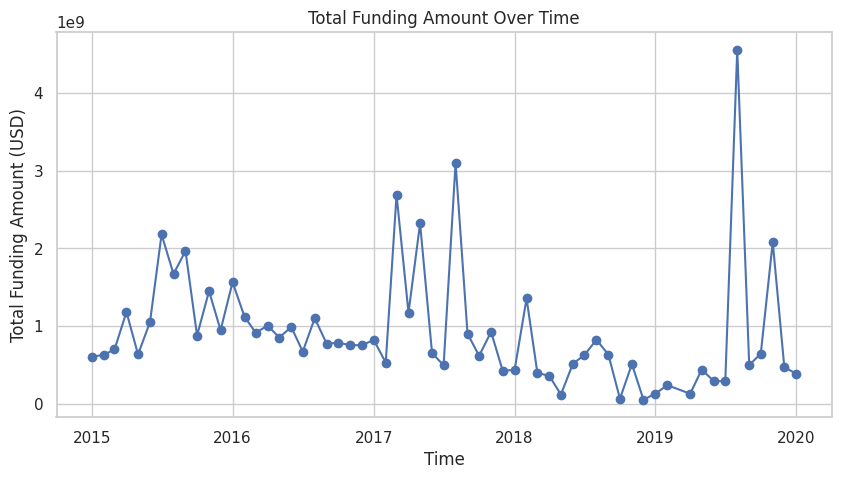

In [ ]:
# Plot total funding amount over time
plt.figure(figsize=(10,5))
plt.plot(monthly_funding['year_month'], monthly_funding['total_funding'], marker='o', linestyle='-')
plt.title('Total Funding Amount Over Time')
plt.xlabel('Time')
plt.ylabel('Total Funding Amount (USD)')
plt.grid(True)
plt.show()

- Fluctuations: Noticeable fluctuations in total funding amounts between 2015 and 2020
 - Peak: Peak funding amount was observed in 2019.
- Low Activity: Low funding activity in late 2018 and early 2019.

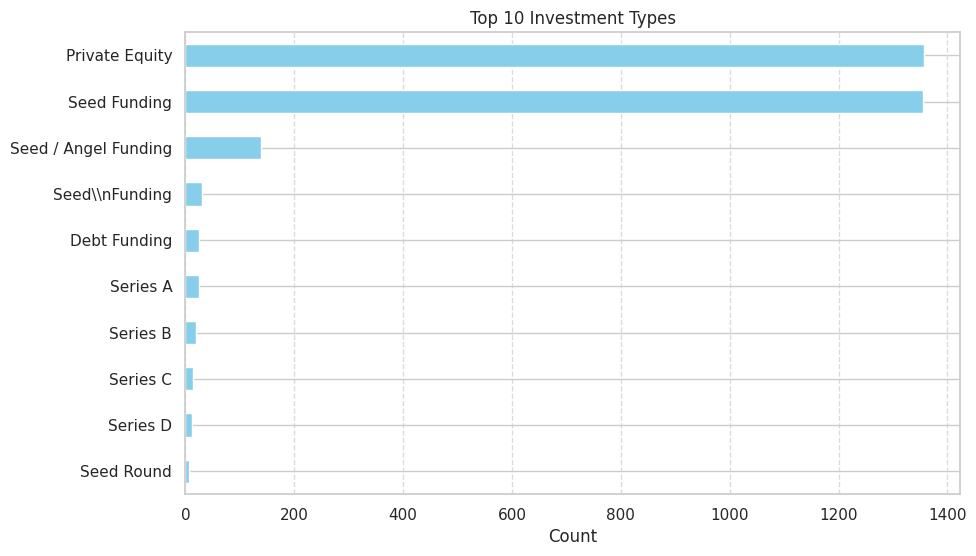

In [ ]:
# Calculate the count of each investment type and select the top 10

top_investment_types = df['investment_type'].value_counts().head(10).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
top_investment_types.plot(kind='barh', color='skyblue')
plt.title('Top 10 Investment Types')
plt.xlabel('Count')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

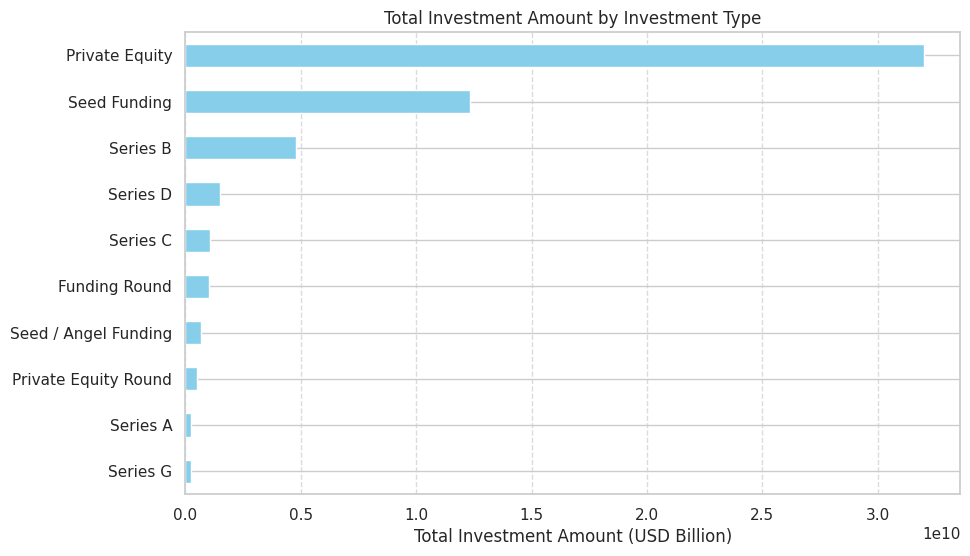

In [ ]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('investment_type')['amount_USD'].sum().nlargest(10).sort_values(ascending=True)


plt.figure(figsize=(10, 6))
top_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Total Investment Amount by Investment Type')
plt.xlabel('Total Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

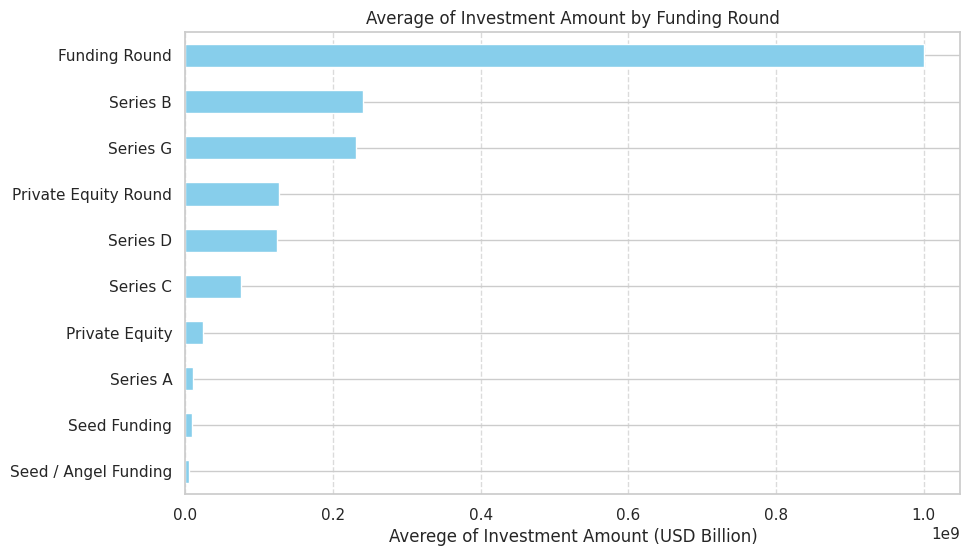

In [ ]:
# Calculate the sum of investment amount for each investment type and select the top 10

top_investment_amounts = df.groupby('investment_type')['amount_USD'].sum().nlargest(10).index

# Calculate the mean investment amount for these top investment types
mean_investment_amounts = df[df['investment_type'].isin(top_investment_amounts)].groupby('investment_type')['amount_USD'].mean().sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
mean_investment_amounts.plot(kind='barh', color='skyblue')
plt.title('Average of Investment Amount by Funding Round')
plt.xlabel('Averege of Investment Amount (USD Billion)')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

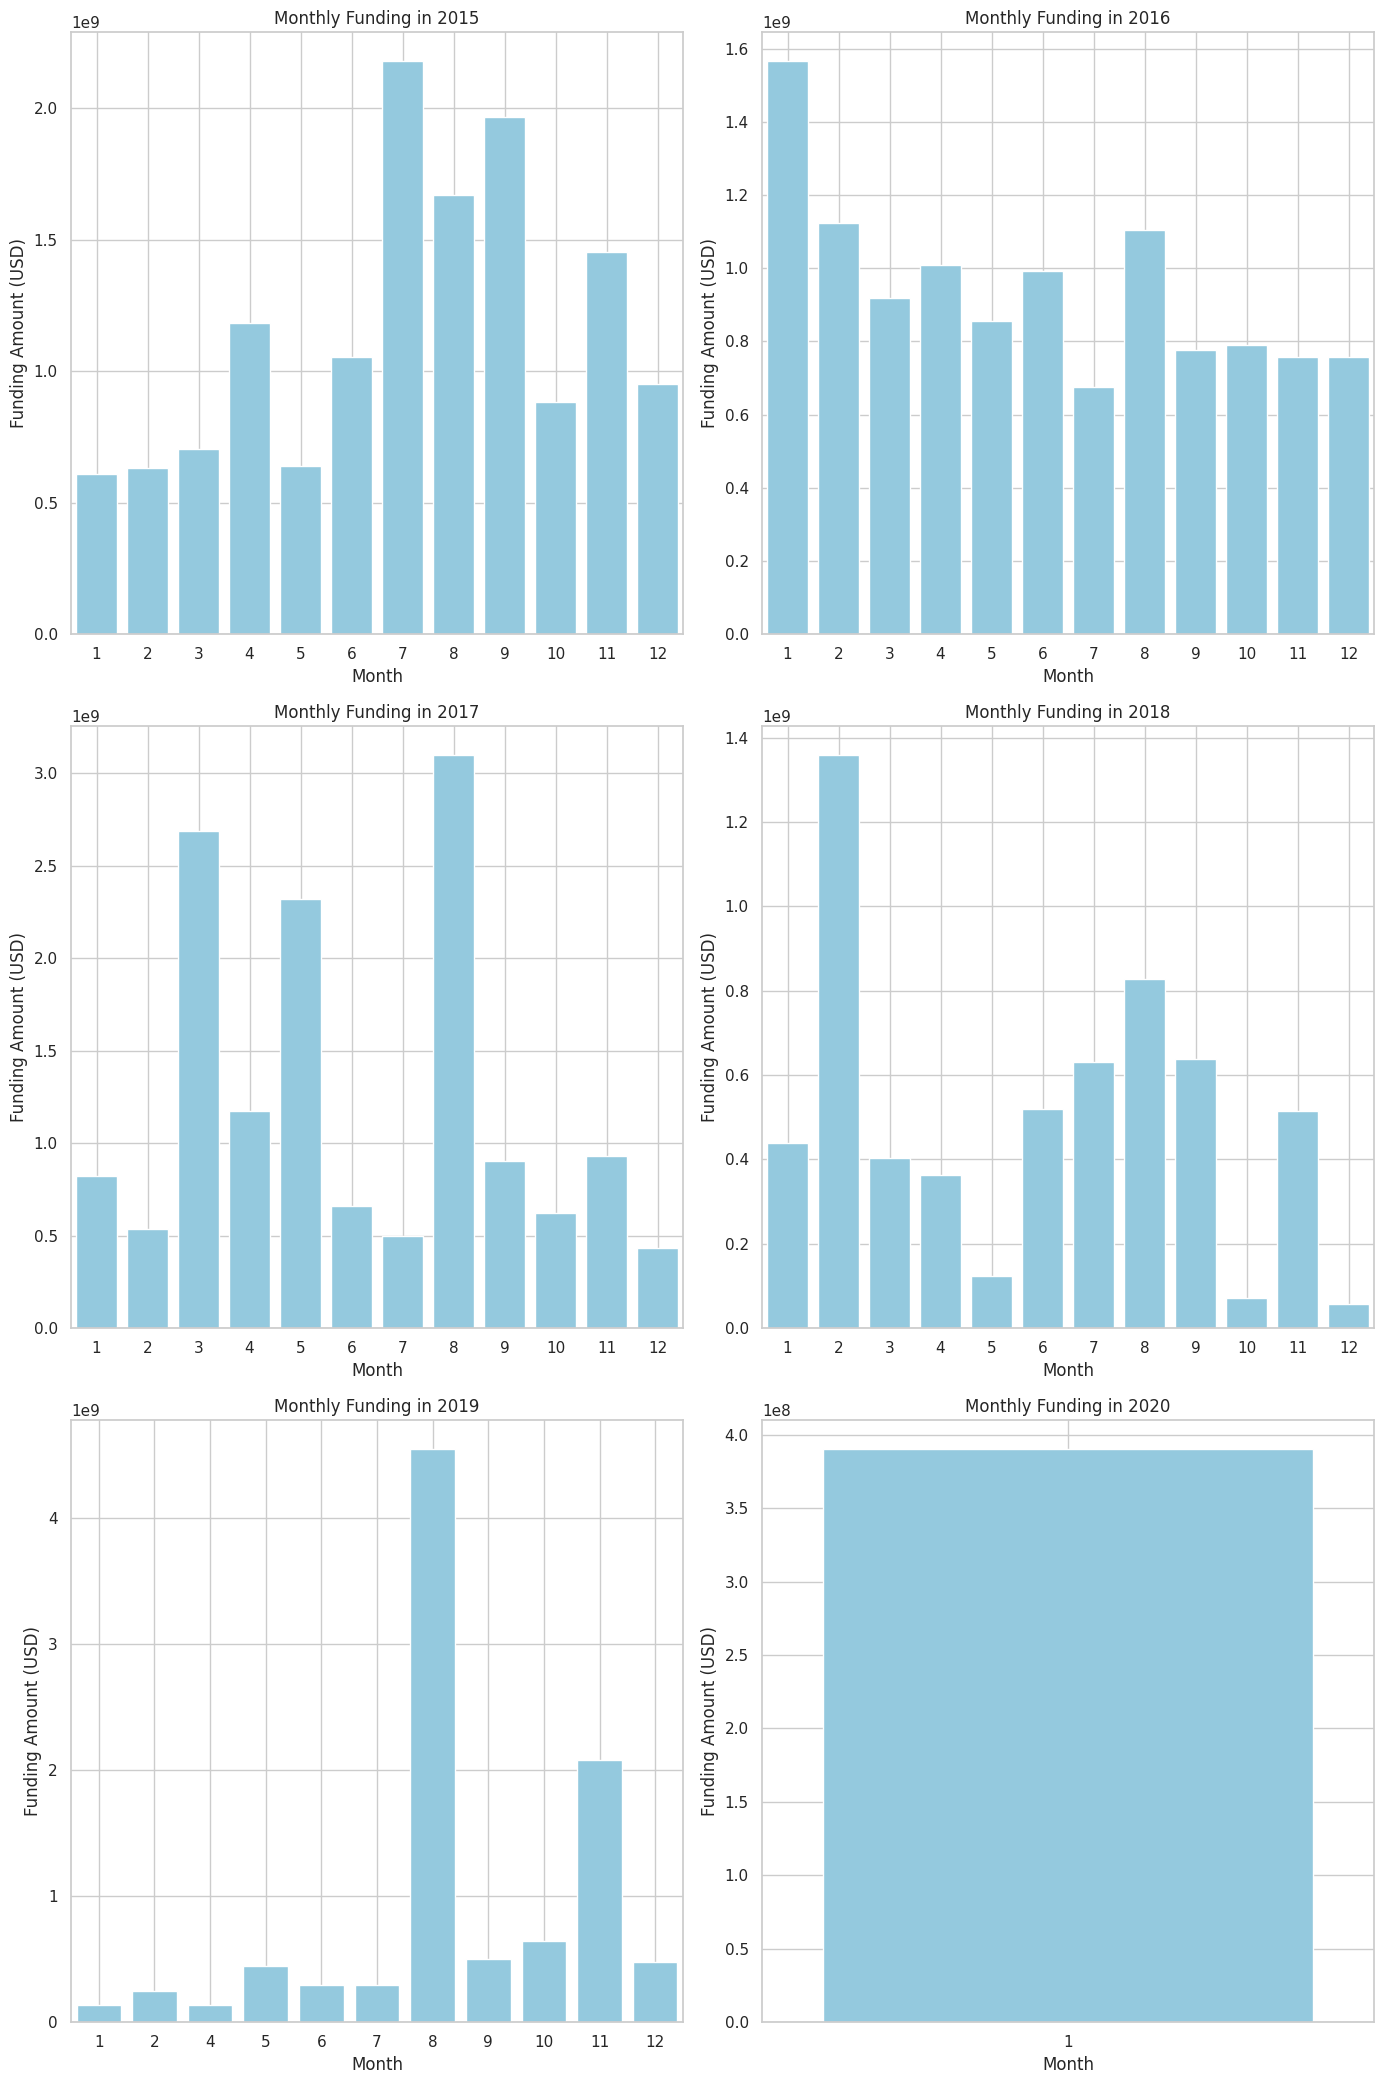

In [ ]:
# Grouping monthly investment amounts using the year and month columns
monthly_funding = df.groupby(['year', 'month'])['amount_USD'].sum().reset_index()

# Unique years in the datase
years = monthly_funding['year'].unique()

# Visualizing monthly investment amounts for each year using subplots
fig, axs = plt.subplots(len(years) // 2, 2, figsize=(14, 7 * (len(years) // 2)))
color = 'skyblue'
for i, year in enumerate(years):
    row = i // 2
    col = i % 2
    sns.barplot(x='month',
                y='amount_USD',
                data=monthly_funding[monthly_funding['year'] == year],
                color=color,
                ax=axs[row, col])
    axs[row, col].set_title(f'Monthly Funding in {year}')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel('Funding Amount (USD)')
    axs[row, col].grid(True)

plt.tight_layout()
plt.show()

##What is the General Amount that Startups get in India?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sr_No                 3044 non-null   int64         
 1   date                  3044 non-null   datetime64[ns]
 2   startup_name          3044 non-null   object        
 3   industry_vertical     2873 non-null   object        
 4   sub_vertical          2108 non-null   object        
 5   city_location         2864 non-null   object        
 6   undisclosed_investor  3020 non-null   object        
 7   investment_type       3040 non-null   object        
 8   amount_USD            3044 non-null   float64       
 9   year                  3044 non-null   int64         
 10  month                 3044 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 261.7+ KB


In [ ]:
# Preview of the Top 10 Most Funded Initiatives

df['amount_USD'].sort_values(ascending = False).head(10)

,amount_USD
60,"3,900,000,000.00"
651,"2,500,000,000.00"
966,"1,400,000,000.00"
830,"1,400,000,000.00"
31,"1,000,000,000.00"
2648,"700,000,000.00"
2459,"680,000,000.00"
188,"600,000,000.00"
33,"585,000,000.00"
2470,"500,000,000.00"


In [ ]:
# Preview of the details of the 10 most funded Initiatives

df.sort_values(by = 'amount_USD', ascending = False).head(10)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
60,61,2019-08-27,Rapido Bike Taxi,Transportation,Bike Taxi,Bangalore,Westbridge Capital,Series B,"3,900,000,000.00",2019,8
651,652,2017-08-11,Flipkart,E-Commerce,Online Marketplace,Bangalore,Softbank,Private Equity,"2,500,000,000.00",2017,8
966,967,2017-03-21,Flipkart,E-Commerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,"1,400,000,000.00",2017,3
830,831,2017-05-18,Paytm,E-Commerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,"1,400,000,000.00",2017,5
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,"1,000,000,000.00",2019,11
2648,2649,2015-07-28,Flipkart.com,Online Marketplace,NaN,Bangalore,Steadview Capital and existing investors,Private Equity,"700,000,000.00",2015,7
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,NaN,New Delhi,"Alibaba Group, Ant Financial",Private Equity,"680,000,000.00",2015,9
188,189,2018-08-30,True North,Finance,Private Equity Firm,Mumbai,NaN,Private Equity,"600,000,000.00",2018,8
33,34,2019-10-02,Udaan,B2B,Business development,Bangalore,"Altimeter Capital, DST Global",Series D,"585,000,000.00",2019,10
2470,2471,2015-08-01,Snapdeal,Ecommerce Marketplace,NaN,New Delhi,"Alibaba, Foxconn, Softbank",Private Equity,"500,000,000.00",2015,8


In [ ]:
# Calculating the average funding received by a startup

df['amount_USD'].mean()

np.float64(18429897.27080872)

In [ ]:
# Preview of the least funded initiatives
df['amount_USD'].sort_values().head(10)

,amount_USD
3020,"16,000.00"
3021,"16,000.00"
3019,"16,000.00"
3018,"16,000.00"
3017,"16,000.00"
2935,"16,600.00"
2933,"16,600.00"
2937,"16,600.00"
2938,"16,600.00"
2934,"16,600.00"


In [ ]:
# Preview of the details of the least funded initiatives

df.sort_values(by = 'amount_USD').head(5)

,sr_No,date,startup_name,industry_vertical,sub_vertical,city_location,undisclosed_investor,investment_type,amount_USD,year,month
3020,3021,2015-01-19,Enabli,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3021,3022,2015-01-19,CBS,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3019,3020,2015-01-19,Yo Grad,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3018,3019,2015-01-19,Play your sport,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1
3017,3018,2015-01-19,Hostel Dunia,NaN,NaN,NaN,Hyderabad Angels (at Startup Heroes event),Seed Funding,"16,000.00",2015,1


##Which Kind of Industries are more preferred for Startups?

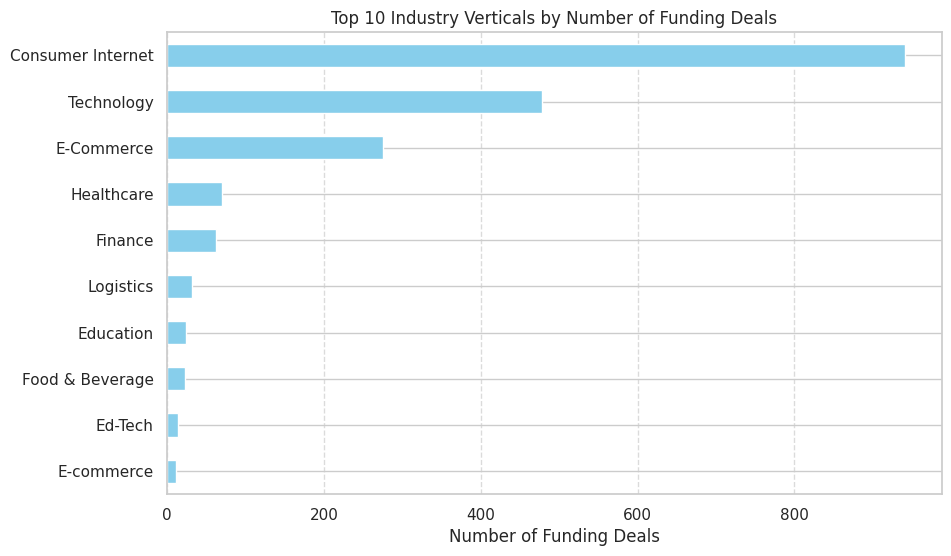

In [ ]:
# Calculate the number of funding deals for each industry vertical and select the top 10
top_industry_verticals = df['industry_vertical'].value_counts().nlargest(10).sort_values(ascending=True)

# Create the bar chart
plt.figure(figsize=(10, 6))
top_industry_verticals.plot(kind='barh', color='skyblue')
plt.title('Top 10 Industry Verticals by Number of Funding Deals')
plt.xlabel('Number of Funding Deals')
plt.ylabel('')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Top Industries:

- Consumer Internet: Leading with the highest number of funding rounds (589 rounds).
- Technology: Second most active with 310 funding rounds.
- E-commerce: Significant presence with 170 funding rounds.

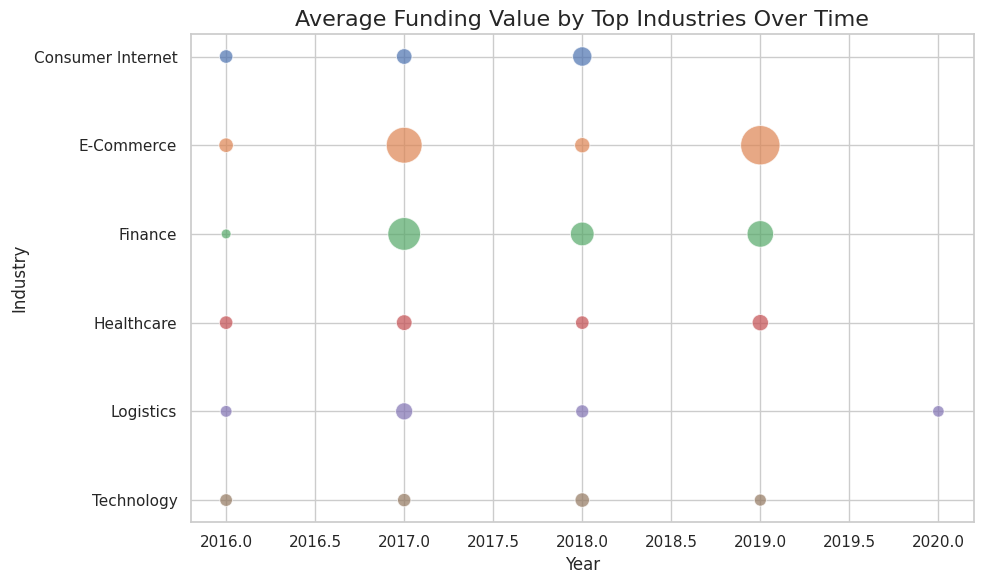

In [ ]:
top_industries = ["Consumer Internet", "Technology", "E-Commerce", "Healthcare", "Finance", "Logistics"]
temp_df = df.groupby(["industry_vertical", "year"])['amount_USD'].agg(["size", "mean"]).reset_index()
temp_df = temp_df[temp_df["industry_vertical"].isin(top_industries)]
temp_df = temp_df[temp_df["year"] != 2015]
temp_df.columns = ["IndustryVertical", "Year", "Count", "Mean"]

# Create the scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

# Set a clean style
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))

# Scatter plot (bubble chart)
scatter = sns.scatterplot(
    data=temp_df,
    x="Year",
    y="IndustryVertical",
    hue="IndustryVertical",
    size="Mean",
    sizes=(50, 800),   # Adjust bubble size range
    alpha=0.7,
    legend=False       # Equivalent to showlegend=False
)

# Customize title and labels (Step 7)
plt.title("Average Funding Value by Top Industries Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Industry", fontsize=12)

plt.tight_layout()
plt.show()


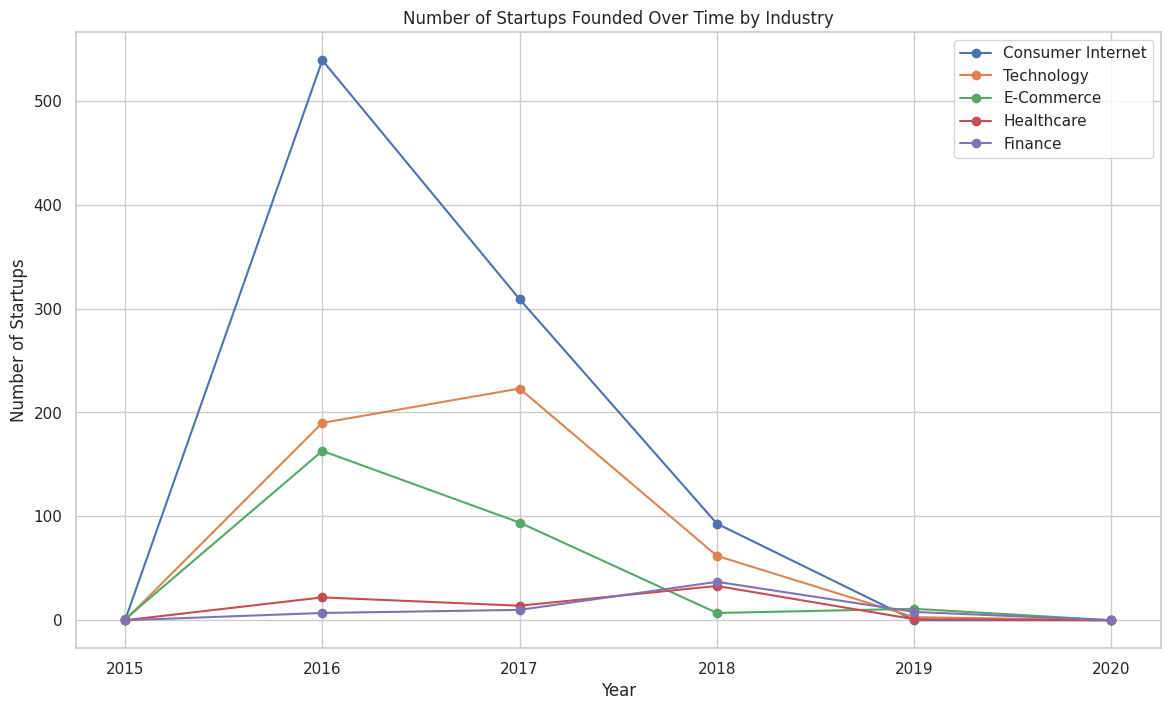

In [ ]:
top_industries = df[df['industry_vertical'] != 'unknown']['industry_vertical'].value_counts().head(10).reset_index()

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

# Extract year and group by year and industry
df['year'] = df['date'].dt.year
yearly_industry_count = df.groupby(['year', 'industry_vertical']).size().unstack().fillna(0)

# List of top industries
top_industries_list = top_industries['industry_vertical'].head(5)

# Plotting the line plots for top industries over time
plt.figure(figsize=(14, 8))
for industry in top_industries_list:
    plt.plot(yearly_industry_count.index, yearly_industry_count[industry], marker='o', label=industry)
plt.title('Number of Startups Founded Over Time by Industry')
plt.xlabel('Year')
plt.ylabel('Number of Startups')
plt.legend()
plt.grid(True)
plt.show()

##Does Location also play a role, In determining the Growth of a Startup?

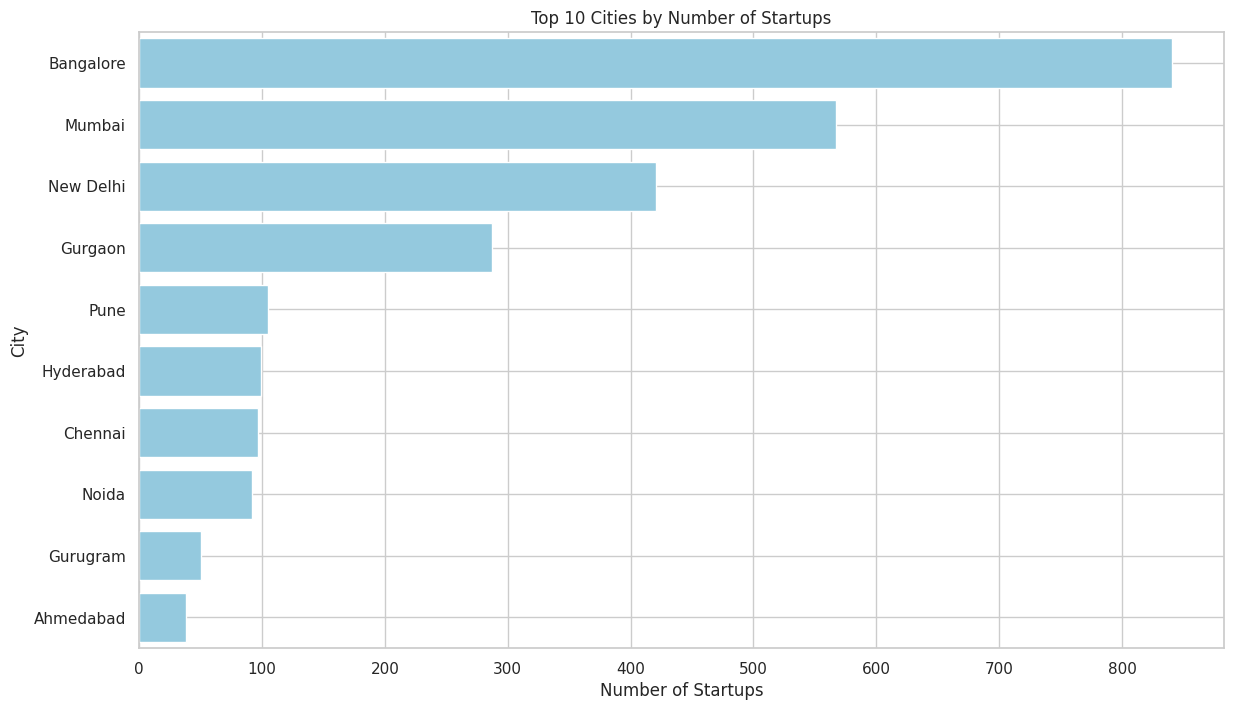

In [ ]:
# Count the number of startups in each city
top_cities_count = df['city_location'].value_counts().head(10).reset_index()
top_cities_count.columns = ['City', 'Count']

# Plot the number of startups by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Count', y='City', data=top_cities_count, color='skyblue')
plt.title('Top 10 Cities by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('City')
plt.grid(True)
plt.show()

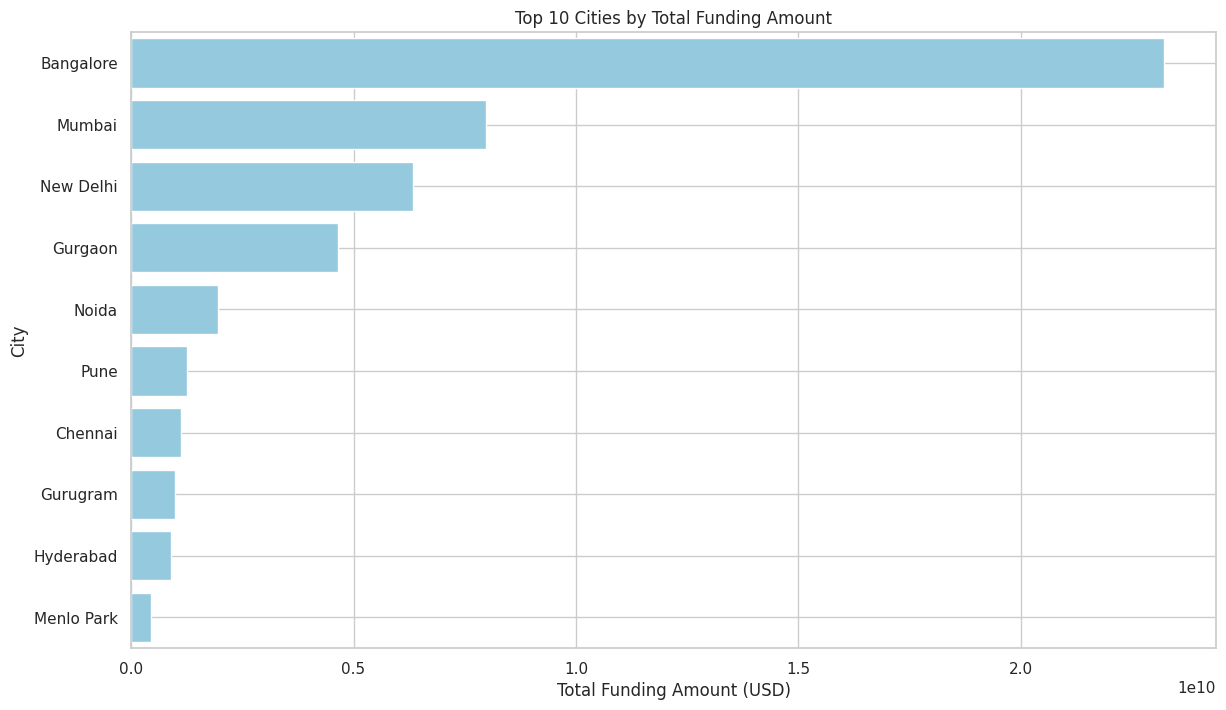

In [ ]:
# Calculate the total funding amount received by startups in each city
top_cities_funding = df.groupby('city_location')['amount_USD'].sum().reset_index()
top_cities_funding = top_cities_funding.sort_values(by='amount_USD', ascending=False).head(10)
top_cities_funding.columns = ['City', 'Total Funding Amount']

# Plot the total funding amount by city
plt.figure(figsize=(14, 8))
sns.barplot(x='Total Funding Amount', y='City', data=top_cities_funding, color='skyblue')
plt.title('Top 10 Cities by Total Funding Amount')
plt.xlabel('Total Funding Amount (USD)')
plt.ylabel('City')
plt.grid(True)
plt.show()


##Who plays the main role in Indian Startups Ecosystem?

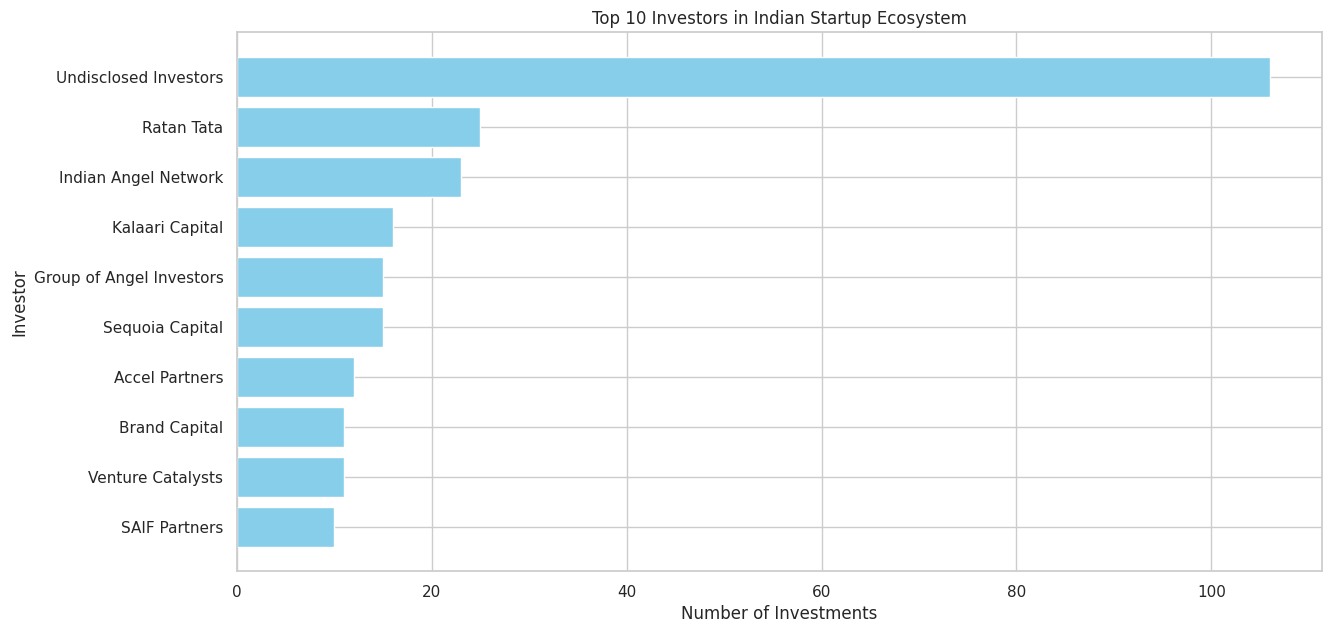

In [ ]:
# Investor analysis
investor_funding = df['undisclosed_investor'].value_counts().reset_index()
investor_funding.columns = ['Investor', 'Number of Investments']

# Top 10 most invested investors
top_investors = investor_funding.head(10)

plt.figure(figsize=(14, 7))
plt.barh(top_investors['Investor'],
         top_investors['Number of Investments'],
         color='skyblue')
plt.xlabel('Number of Investments')
plt.ylabel('Investor')
plt.title('Top 10 Investors in Indian Startup Ecosystem')
plt.gca().invert_yaxis()
plt.show()

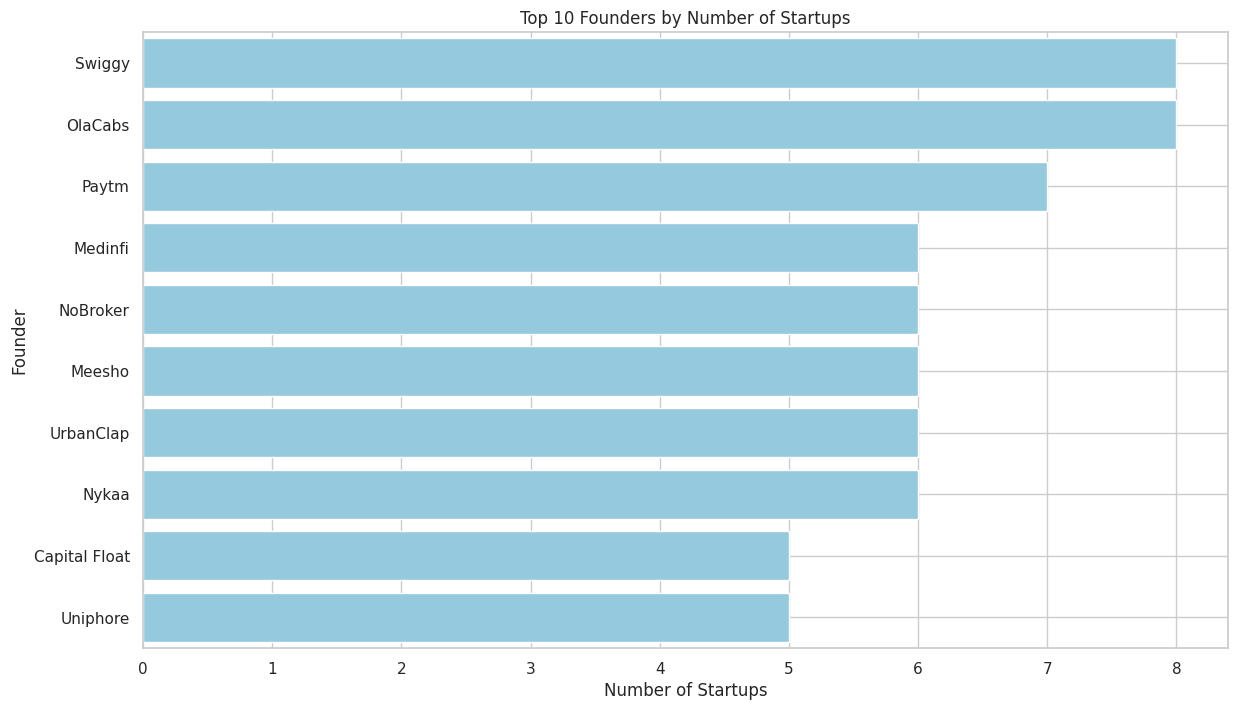

In [ ]:
df['Founders'] = df['startup_name'].fillna('Unknown').str.split(',')

# Explode the list of founders into separate rows
founders_exploded = df.explode('Founders')

# Count the number of startups for each founder and select the top 10
top_founders = founders_exploded['Founders'].value_counts().head(10).reset_index()
top_founders.columns = ['Founder', 'Number of Startups']

# Plot the top founders
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Startups', y='Founder', data=top_founders, color='skyblue')
plt.title('Top 10 Founders by Number of Startups')
plt.xlabel('Number of Startups')
plt.ylabel('Founder')
plt.grid(True)
plt.show()


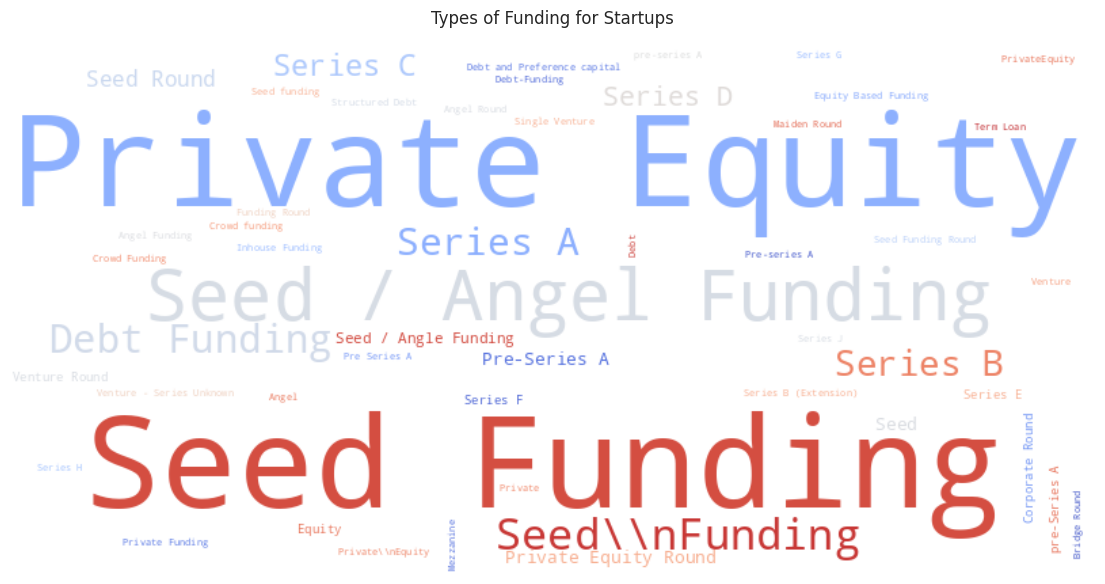

In [ ]:
from wordcloud import WordCloud

# Count the number of each investment type
investment_types = df['investment_type'].value_counts().reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Convert the investment types to a dictionary
investment_dict = dict(zip(investment_types['Investment Type'], investment_types['Number of Investments']))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='coolwarm').generate_from_frequencies(investment_dict)

# Plot the word cloud
plt.figure(figsize=(14, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Types of Funding for Startups')
plt.show()


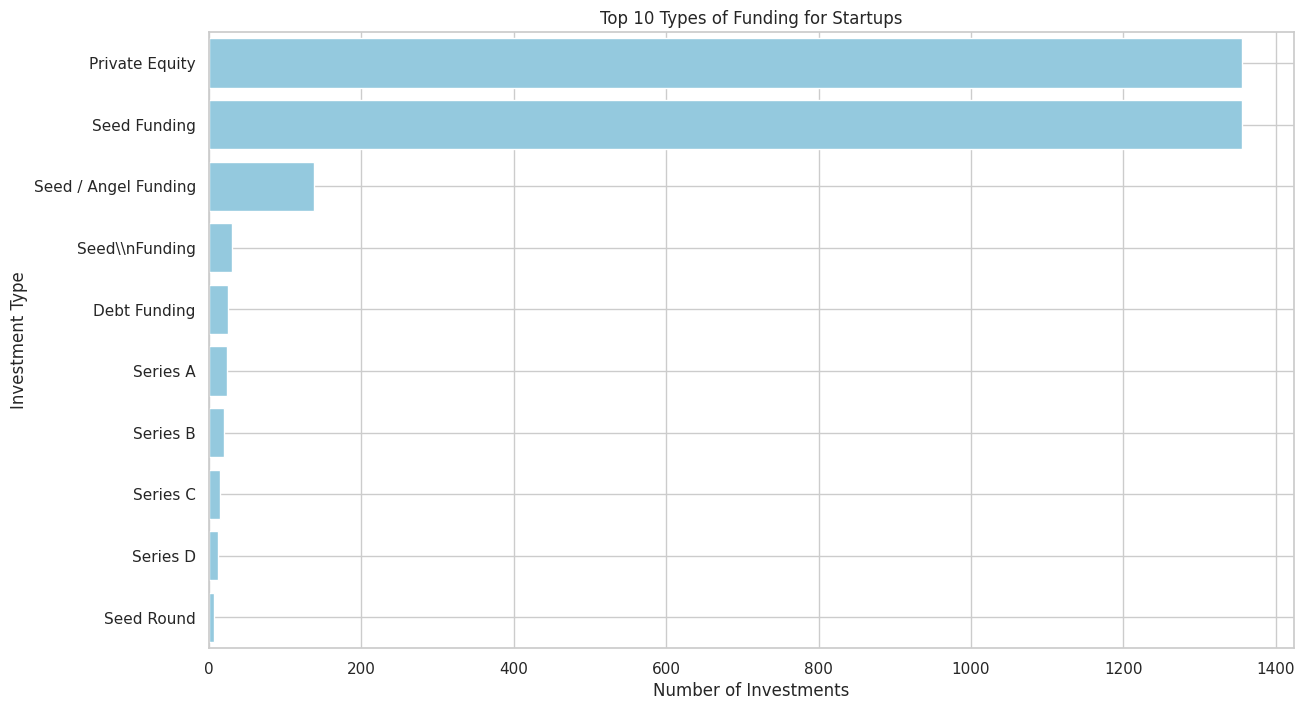

In [ ]:
# Count the number of each investment type and select the top 10
investment_types = df['investment_type'].value_counts().head(10).reset_index()
investment_types.columns = ['Investment Type', 'Number of Investments']

# Plot the investment types
plt.figure(figsize=(14, 8))
sns.barplot(x='Number of Investments', y='Investment Type', data=investment_types, color='skyblue')
plt.title('Top 10 Types of Funding for Startups')
plt.xlabel('Number of Investments')
plt.ylabel('Investment Type')
plt.grid(True)
plt.show()

**Private Equity**: Most Common Funding Type: Private Equity is the most common funding type, with nearly 1,400 instances. This indicates that many startups in the dataset have reached a level of maturity where they can attract significant private equity investments.

#Conclusions:

##Key Findings:



**Funding Trends Over Time**:

- There is a noticeable trend in the amount of funding received by startups over the years.
- Certain years showed significant spikes in funding, indicating periods of high investor interest and economic growth.

**General Funding Amounts**:

- The analysis revealed a wide range of funding amounts, with some startups receiving substantial investments.
- The majority of startups received funding in specific ranges, highlighting the typical investment sizes.

**Industry Preferences**:

- Industries such as Technology, E-Commerce, Healthcare, and Finance were among the top sectors receiving the most funding.
- This indicates a strong investor preference for these sectors due to their high growth potential and market demand.

**Geographical Influence**:

- Cities like Bangalore, Mumbai, and New Delhi emerged as the top locations for startup funding.
- These cities provide a conducive environment for startups due to better infrastructure, access to investors, and a supportive ecosystem.

**Key Players in the Ecosystem**:

- Analysis of investors revealed the top investors contributing to the startup ecosystem.
- These investors played a significant role in nurturing and growing startups, providing not just funding but also mentorship and networking opportunities.

**Types of Funding**:

Various types of funding were identified, including Seed Funding, Series A, Series B, etc.
Each type of funding serves a different purpose, from initial product development to scaling operations and market expansion.

**Recommendations**:

For Startups:

- Focus on High-Growth Industries: Startups should consider entering industries with high investor interest such as Technology, E-Commerce, and Healthcare.
- Leverage Geographical Advantages: Establishing operations in startup hubs like Bangalore, Mumbai, and New Delhi can provide better access to funding and resources.
- Diversify Funding Sources: Explore different types of funding and build relationships with multiple investors to secure necessary capital at various growth stages.

For Investors:

- Identify Emerging Sectors: Stay updated with market trends to identify new and emerging sectors with high growth potential.
- Support Ecosystem Development: Invest in building infrastructure and support systems in emerging startup hubs to foster innovation and growth.


 The analysis of the startup funding dataset provides valuable insights into the dynamics of the Indian startup ecosystem. By understanding these trends, stakeholders can make informed decisions to foster growth and innovation in this vibrant sector.

#THANK YOU...